### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as pt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


### READING DATA

In [2]:
df=pd.read_csv('air_lines_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


above you can see first five rows..

In [3]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


To know last five rows tail function is going to help above you can observe.

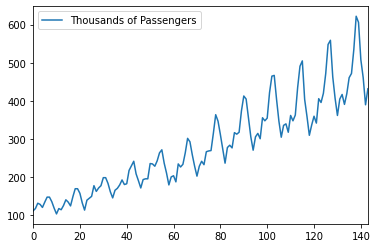

In [4]:
df.plot()

From above we can observe that passengers travelling is increasing compare to past

In [5]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
from fbprophet import Prophet

In [9]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [10]:
# Initialize the Model
model=Prophet()

In [11]:
df.columns

Index(['ds', 'y'], dtype='object')

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [17]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [18]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [19]:
prediction=model.predict(future_dates)

In [20]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,55.461975,112.007794,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,50.428138,106.721863,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,81.484634,139.806008,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,77.428368,135.398153,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,82.017982,138.448260,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


In [29]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,498.212874,469.809981,525.942888
505,1961-11-28,496.690278,468.897080,524.807285
506,1961-11-29,494.537090,467.557658,524.071263
507,1961-11-30,491.797718,463.316041,519.822881
508,1961-12-01,488.531726,461.195237,516.451608


Prediction range is in between yhat_lower and yhat_upper..in the sense it will take mean

In [30]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.637236,55.461975,112.007794
1,1949-02-01,78.052782,50.428138,106.721863
2,1949-03-01,110.256234,81.484634,139.806008
3,1949-04-01,107.735292,77.428368,135.398153
4,1949-05-01,111.242092,82.017982,138.448260


#### Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

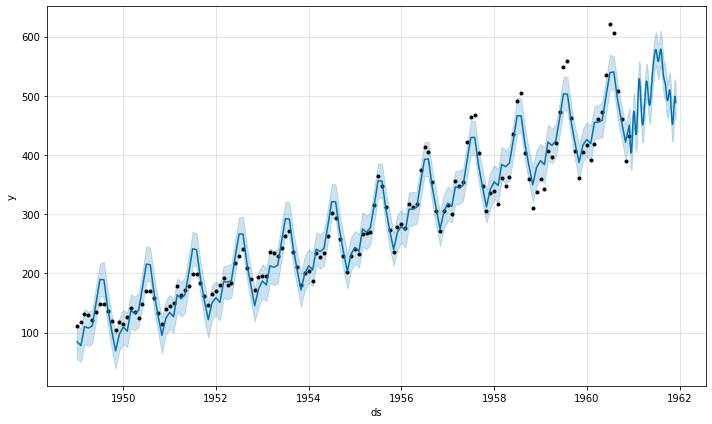

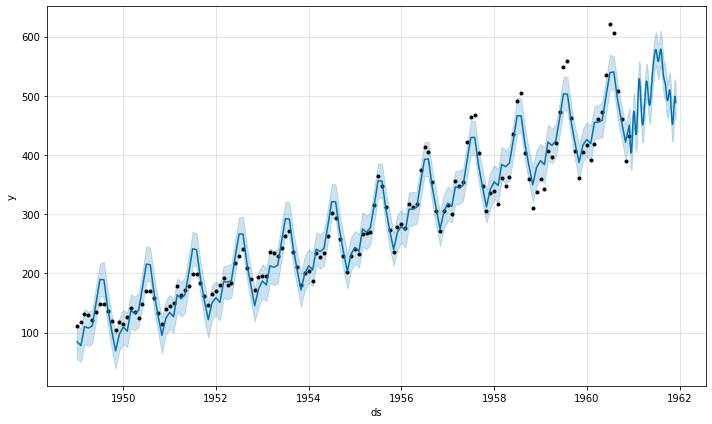

In [21]:
### plot the predicted projection
model.plot(prediction)

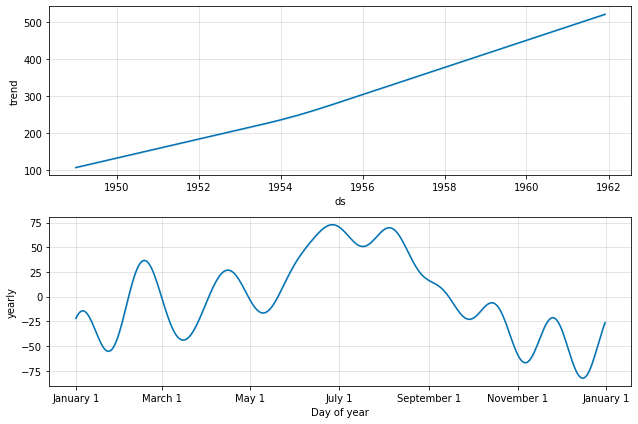

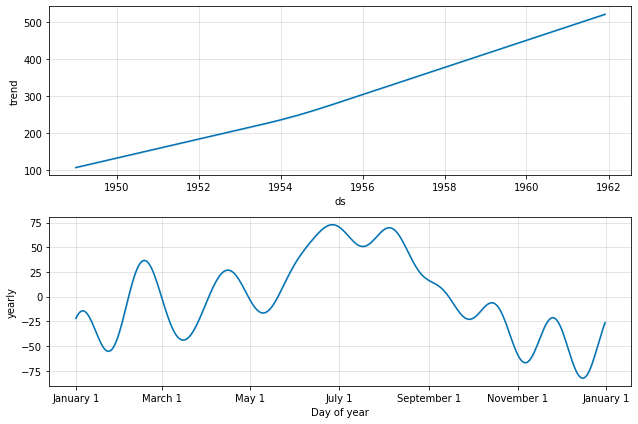

In [22]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

# Time Series Analysis

In [23]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


#### Cross Validation

--->Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

      * horizon the forecast horizon
      * initial the size of the initial training period
      * period the spacing between cutoff dates

In [24]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.482129,158.196197,158.769312,150,1951-01-18
1,1951-03-01,171.498221,170.396824,172.555126,178,1951-01-18
2,1951-04-01,159.630469,157.492962,161.658221,163,1951-01-18
3,1951-05-01,144.280404,140.866877,147.670250,172,1951-01-18
4,1951-06-01,178.395560,173.591056,183.326545,178,1951-01-18


#### Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [25]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


In [26]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


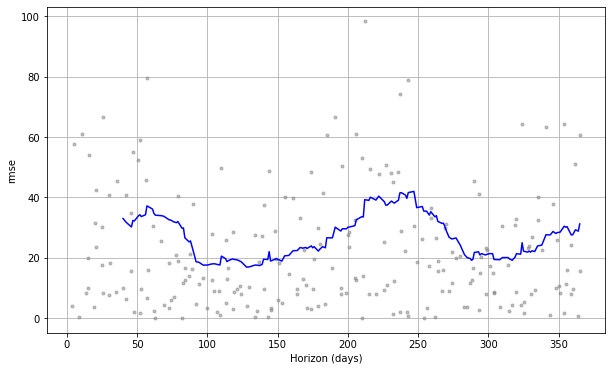

In [27]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')